# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Business Questions


1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?
2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

# Hipóteses

H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis com porão possuem área total (sqrt_lot) 50% maiores do que os imóveis sem porão.

H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

H6: Imóveis renovados são em média 20% mais baratos que os imóveis construidos no mesmo ano

H7: Imóveis variam 30% de média de preço por condição

H8: Imóveis variam 20% de média de preço por número de andares

H9: Imóveis com mais de 2 quartos são 70% mais caros que os que possuem apenas 1

H10: Imóveis variam 5% ou mais o preço por nota de design, em média

# Data colect

<img src="dict.png" width="1000" height="400">

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

id       date        price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00000         3    1.00000         1180   
1  6414100192 2014-12-09 538000.00000         3    2.25000         2570   
2  5631500400 2015-02-25 180000.00000         2    1.00000          770   
3  2487200875 2014-12-09 604000.00000         4    3.00000         1960   
4  1954400510 2015-02-18 510000.00000         3    2.00000         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650 1.00000           0     0          3      7        1180   
1      7242 2.00000           0     0          3      7        2170   
2     10000 1.00000           0     0          3      6         770   
3      5000 1.00000           0     0          5      7        1050   
4      8080 1.00000           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
0              0      1955             0    98178 47.51120 -122.25700   
1            400      1951          1991    98125 47.72100 -122.31900   
2              0      1933             0    98028 47.73790 -122.23300   
3            910      1965             0    98136 47.52080 -122.39300   
4              0      1987             0    98074 47.61680 -122.04500   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [6]:
df.shape

(21613, 21)

In [7]:
dfna = df.dropna()
dfna.shape

(21613, 21)

Esse dataset não possui dados vazios!

In [8]:
df_num = df.drop(['id', 'date'], axis=1) 
df_num

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00000         3    1.00000         1180      5650 1.00000   
1     538000.00000         3    2.25000         2570      7242 2.00000   
2     180000.00000         2    1.00000          770     10000 1.00000   
3     604000.00000         4    3.00000         1960      5000 1.00000   
4     510000.00000         3    2.00000         1680      8080 1.00000   
...            ...       ...        ...          ...       ...     ...   
21608 360000.00000         3    2.50000         1530      1131 3.00000   
21609 400000.00000         4    2.50000         2310      5813 2.00000   
21610 402101.00000         2    0.75000         1020      1350 2.00000   
21611 400000.00000         3    2.50000         1600      2388 2.00000   
21612 325000.00000         2    0.75000         1020      1076 2.00000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat       long  sqft_living15  \
0          1955             0    98178 47.51120 -122.25700           1340   
1          1951          1991    98125 47.72100 -122.31900           1690   
2          1933             0    98028 47.73790 -122.23300           2720   
3          1965             0    98136 47.52080 -122.39300           1360   
4          1987             0    98074 47.61680 -122.04500           1800   
...         ...           ...      ...      ...        ...            ...   
21608      2009             0    98103 47.69930 -122.34600           1530   
21609      2014             0    98146 47.51070 -122.36200           1830   
21610      2009             0    98144 47.59440 -122.29900           1020   
21611      2004             0    98027 47.53450 -122.06900           1410   
21612      2008             0    98144 47.59410 -122.29900           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 19 columns]

In [9]:
df_min = pd.DataFrame(df_num.apply(np.min))

In [10]:
df_max = pd.DataFrame(df_num.apply(np.max))

In [11]:
df_range = pd.DataFrame(df_num.apply(lambda x: x.max() - x.min()))

In [12]:
df_median = pd.DataFrame(df_num.apply(np.median))

In [13]:
df_mean = pd.DataFrame(df_num.apply(np.mean))

In [14]:
df_std = pd.DataFrame(df_num.apply(np.std))

In [15]:
#Tabela de estatística descritiva
desc_stats = pd.concat([df_min, df_max, df_range, df_median, df_mean, df_std], axis=1)
desc_stats.columns = ['min', 'max', 'range', 'median', 'mean', 'std']
desc_stats

min           max         range       median  \
price         75000.00000 7700000.00000 7625000.00000 450000.00000   
bedrooms          0.00000      33.00000      33.00000      3.00000   
bathrooms         0.00000       8.00000       8.00000      2.25000   
sqft_living     290.00000   13540.00000   13250.00000   1910.00000   
sqft_lot        520.00000 1651359.00000 1650839.00000   7618.00000   
floors            1.00000       3.50000       2.50000      1.50000   
waterfront        0.00000       1.00000       1.00000      0.00000   
view              0.00000       4.00000       4.00000      0.00000   
condition         1.00000       5.00000       4.00000      3.00000   
grade             1.00000      13.00000      12.00000      7.00000   
sqft_above      290.00000    9410.00000    9120.00000   1560.00000   
sqft_basement     0.00000    4820.00000    4820.00000      0.00000   
yr_built       1900.00000    2015.00000     115.00000   1975.00000   
yr_renovated      0.00000    2015.00000    2015.00000      0.00000   
zipcode       98001.00000   98199.00000     198.00000  98065.00000   
lat              47.15590      47.77760       0.62170     47.57180   
long           -122.51900    -121.31500       1.20400   -122.23000   
sqft_living15   399.00000    6210.00000    5811.00000   1840.00000   
sqft_lot15      651.00000  871200.00000  870549.00000   7620.00000   

                      mean          std  
price         540088.14177 367118.70318  
bedrooms           3.37084      0.93004  
bathrooms          2.11476      0.77015  
sqft_living     2079.89974    918.41965  
sqft_lot       15106.96757  41419.55327  
floors             1.49431      0.53998  
waterfront         0.00754      0.08652  
view               0.23430      0.76630  
condition          3.40943      0.65073  
grade              7.65687      1.17543  
sqft_above      1788.39069    828.07182  
sqft_basement    291.50905    442.56480  
yr_built        1971.00514     29.37273  
yr_renovated      84.40226    401.66995  
zipcode        98077.93980     53.50379  
lat               47.56005      0.13856  
long            -122.21390      0.14083  
sqft_living15   1986.55249    685.37545  
sqft_lot15     12768.45565  27303.54796

In [16]:
bed33 = df[df['bedrooms'] == 33]
bed33

id       date        price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25 640000.00000        33    1.75000         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15870      6000 1.00000           0     0          5      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
15870            580      1947             0    98103 47.68780 -122.33100   

       sqft_living15  sqft_lot15  
15870           1330        4700

In [17]:
df_agrouped = df[['id', 'bedrooms']].groupby('bedrooms').count().sort_values('bedrooms').reset_index()
df_agrouped

bedrooms    id
0          0    13
1          1   199
2          2  2760
3          3  9824
4          4  6882
5          5  1601
6          6   272
7          7    38
8          8    13
9          9     6
10        10     3
11        11     1
12        33     1

In [18]:
#Excluindo o imóvel com 33 quartos pois certamente ouve erro de digitação

df = df.drop(15870)

# Testando hipóteses

H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis com porão possuem área total (sqrt_lot) 50% maiores do que os imóveis sem porão.

H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

H6: Imóveis renovados são em média 20% mais baratos que os imóveis construidos no mesmo ano

H7: Imóveis variam 30% de média de preço por condição

H8: Imóveis variam 20% de média de preço por número de andares

H9: Imóveis com mais de 2 quartos são 70% mais caros que os que possuem apenas 1

H10: Imóveis variam 5% ou mais o preço por nota de design, em média

In [19]:
#H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

df_agrouped = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
df_agrouped

waterfront         price
0           0  531558.54427
1           1 1661876.02454

Falso! Na verdade é mais de 200% mais caro.

In [20]:
#H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

df_agrouped = df.loc[df['yr_built'] < 1955, 'price'].mean()
df_agrouped

537034.2033100763

In [21]:
df_agrouped = df.loc[df['yr_built'] >= 1955, 'price'].mean()
df_agrouped

541299.9684769241

Hipótese falsa.

In [22]:
#H3: Imóveis com porão possuem sqrt_lot 50% maiores do que os imóveis sem porão.

df_agrouped = df.loc[df['sqft_basement'] == 0, 'sqft_lot'].mean()
df_agrouped

16284.176824622886

In [23]:
df_agrouped = df.loc[df['sqft_basement'] != 0, 'sqft_lot'].mean()
df_agrouped

13287.153547018619

Hipótese falsa.

In [24]:
#H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

df_agrouped = df[['price', 'yr_built']].groupby('yr_built').mean().sort_values('yr_built').reset_index()
df_agrouped

yr_built        price
0        1900 581387.20690
1        1901 556935.93103
2        1902 673007.40741
3        1903 480958.19565
4        1904 583756.64444
..        ...          ...
111      2011 544522.00000
112      2012 527447.33529
113      2013 678545.45274
114      2014 683681.75492
115      2015 759785.15789

[116 rows x 2 columns]

<AxesSubplot: xlabel='yr_built', ylabel='price'>

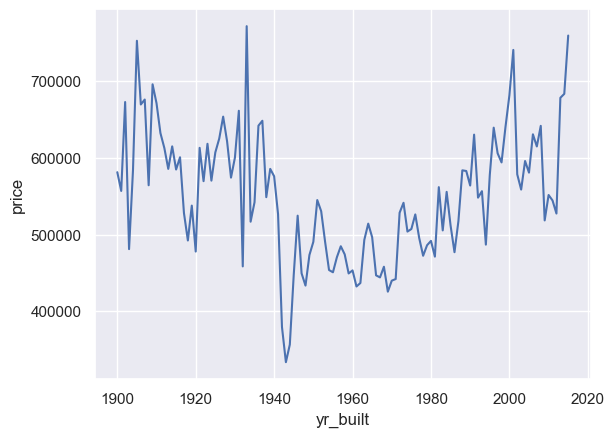

In [25]:
sns.set()
sns.lineplot(data=df_agrouped, x='yr_built', y='price')

Hipótese falsa.

In [26]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [27]:
#H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

df['month'] = df['date'].apply(lambda x: str(x)[5:7])

In [28]:
df_agrouped = df[['price', 'month']].groupby('month').mean().sort_values('month').reset_index()
df_agrouped

month        price
0     01 525870.88957
1     02 507851.37120
2     03 543977.18720
3     04 561837.77499
4     05 550768.78583
5     06 557964.56861
6     07 544788.76436
7     08 536445.27680
8     09 529253.82187
9     10 539026.97178
10    11 521961.00921
11    12 524461.86676

<AxesSubplot: xlabel='month', ylabel='price'>

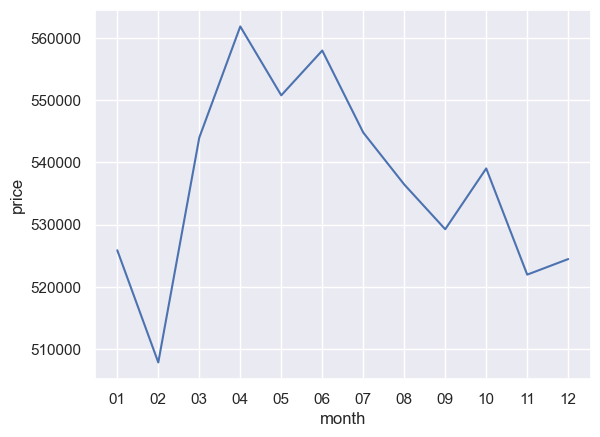

In [29]:
sns.lineplot(data=df_agrouped, x='month', y='price')

Hipótese falsa.

In [30]:
#H6: Imóveis renovados são em média 20% mais baratos que os imóveis construidos no mesmo ano

df_agrouped = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().sort_values('yr_renovated').reset_index()
df_agrouped

yr_renovated        price
0              0 530355.52106
1           1934 459950.00000
2           1940 378400.00000
3           1944 521000.00000
4           1945 398666.66667
..           ...          ...
65          2011 607496.15385
66          2012 625181.81818
67          2013 664663.51351
68          2014 654756.25275
69          2015 658843.75000

[70 rows x 2 columns]

In [31]:
df_agrouped = df.loc[(df['yr_built'] == 1934) | (df['yr_built'] >= 1940), ['price', 'yr_built']].groupby('yr_built').mean().sort_values('yr_built').reset_index()
df_agrouped

yr_built        price
0       1934 516771.42857
1       1940 576119.49359
2       1941 526612.01242
3       1942 379290.49776
4       1943 333373.47059
..       ...          ...
72      2011 544522.00000
73      2012 527447.33529
74      2013 678545.45274
75      2014 683681.75492
76      2015 759785.15789

[77 rows x 2 columns]

Hipótese falsa.

In [32]:
#H7: Imóveis variam pelo menos 30% de média de preço por condição

df_agrouped = df[['price', 'condition']].groupby('condition').mean().sort_values('condition').reset_index()
df_agrouped

condition        price
0          1 334431.66667
1          2 327287.14535
2          3 542012.57815
3          4 521200.39003
4          5 612401.86471

Hipótese falsa.

In [33]:
#H8: Imóveis variam 20% de média de preço por número de andares

df_agrouped = df[['price', 'floors']].groupby('floors').mean().sort_values('floors').reset_index()
df_agrouped

floors         price
0 1.00000  442162.10844
1 1.50000  558980.64293
2 2.00000  648891.16333
3 2.50000 1060346.49068
4 3.00000  582526.03915
5 3.50000  933312.50000

Hipótese falsa.

In [34]:
#H9: Imóveis com mais de 2 quartos são 70% mais caros que os que possuem apenas 1

df_agrouped = df.loc[df['bedrooms'] <= 2, ['price', 'bedrooms']].groupby('bedrooms').mean().sort_values('bedrooms').reset_index()
df_agrouped

bedrooms        price
0         0 409503.84615
1         1 317642.88442
2         2 401372.68188

Hipótese falsa.

In [35]:
#H10: Imóveis variam 5% ou mais o preço por nota de design, em média

df_agrouped = df[['price', 'grade']].groupby('grade').mean().sort_values('grade').reset_index()
df_agrouped

grade         price
0       1  142000.00000
1       3  205666.66667
2       4  214381.03448
3       5  248523.97107
4       6  301919.63739
5       7  402563.82472
6       8  542852.76566
7       9  773513.18585
8      10 1071771.07407
9      11 1496841.72682
10     12 2191222.00000
11     13 3709615.38462

Hipótese verdadeira.

# Respondendo as perguntas de negócio

## Quais são os imóveis que a House Rocket deveria comprar e por qual preço?


In [ ]:
df_agrouped = df[['zipcode', 'price']].groupby('zipcode').median().sort_values('price').reset_index()
df_agrouped

for i in range(len(df)):
    for j in range(len(df_agrouped)):
        if int(df.loc[i, ['zipcode']]) == int(df_agrouped.loc[j, ['zipcode']]):
            if float(df.loc[i, ['price']]) < float(df_agrouped.loc[j, ['price']]):
                df.loc[i, ['status']] = 'yes'
            else:
                df.loc[i, ['status']] = 'no'
        j += i
    i += 1
                
df.head()

In [43]:
i = 0
df.loc[i, ['zipcode']]

pandas.core.series.Series

## Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?